In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
healthy_pre = sc.read_h5ad("../Code/Data/GSE165080_healthy.h5ad")

healthy_post = sc.read_h5ad("../Code/Data/Annotation/GSE165080_healthy_annotation.h5ad")

In [ ]:
healthy_pre.var

In [ ]:
healthy_pre.obs["cell_type_l1"] = healthy_post.obs["predicted.celltype.l1"]
healthy_pre.obs["cell_type_l2"] = healthy_post.obs["predicted.celltype.l2"]
healthy_pre.obs["cell_type_l3"] = healthy_post.obs["predicted.celltype.l3"]
healthy_pre

In [ ]:
healthy_pre.obs

In [ ]:
sc.pl.umap(healthy_pre, color = "cell_type_l1")

In [ ]:
sc.pl.umap(healthy_pre, color = "BioSample")

In [ ]:
healthy = sc.read_h5ad("GSE165080_healthy.h5ad")

# 執行BBKNN

In [2]:
#!pip install bbknn
import scanpy as sc
import bbknn

C:\ProgramData\anaconda3\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\ProgramData\anaconda3\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\ProgramData\anaconda3\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keywo

In [3]:
healthy = sc.read_h5ad("GSE165080_GSE149689_GSE227991_highly_variable_genes.h5ad")

In [4]:
healthy

AnnData object with n_obs × n_vars = 95261 × 10619
    obs: 'Age', 'Gender', 'BioSample', 'n_genes', 'cell_type_l1', 'cell_type_l2', 'cell_type_l3', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_type_l1_colors', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
with open("Merge_data/SraRunTable_GSE227991.txt", 'r') as file:
    sra_GSE227991 = pd.read_csv(file, index_col = 0)
with open("Merge_data/SraRunTable_GSE165080.txt", 'r') as file:
    sra_GSE165080 = pd.read_csv(file, index_col = 0)
with open("Merge_data/SraRunTable_GSE149689.txt", 'r') as file:
    sra_GSE149689 = pd.read_csv(file, index_col = 0)
for i in sra_GSE227991["BioSample"]:
    healthy.obs.loc[healthy.obs.BioSample == i, "Database"] = "GSE227991"
for i in sra_GSE165080["BioSample"]:
    healthy.obs.loc[healthy.obs.BioSample == i, "Database"] = "GSE165080"
for i in sra_GSE149689["BioSample"]:
    healthy.obs.loc[healthy.obs.BioSample == i, "Database"] = "GSE149689"

In [6]:
sra_GSE165080

,Age,Assay Type,AvgSpotLen,Bases,BioProject,BioSample,Bytes,Cell_type,Center Name,Consent,...,Platform,ReleaseDate,create_date,version,Sample Name,source_name,SRA Study,Tissue,disease_duration,patient_comorbidity
Run,,,,,,,,,,,,,,,,,,,,,
SRR13482553,34,RNA-Seq,117,43670591172,PRJNA693201,SAMN17379694,13867393610,peripheral blood mono-nuclear cells,GEO,public,...,ILLUMINA,2022-02-20T00:00:00Z,2021-01-19T13:19:00Z,1,GSM5025771,Peripheral blood,SRP302338,Peripheral blood,NaN,NaN
SRR13482558,51,RNA-Seq,117,43875241488,PRJNA693201,SAMN17379721,14037400004,peripheral blood mono-nuclear cells,GEO,public,...,ILLUMINA,2022-02-20T00:00:00Z,2021-01-19T15:16:00Z,1,GSM5025776,Peripheral blood,SRP302338,Peripheral blood,NaN,NaN
SRR13482560,52,RNA-Seq,117,48199474323,PRJNA693201,SAMN17379592,15340211276,peripheral blood mono-nuclear cells,GEO,public,...,ILLUMINA,2022-02-20T00:00:00Z,2021-01-19T16:36:00Z,1,GSM5025778,Peripheral blood,SRP302338,Peripheral blood,NaN,NaN
SRR13482562,56,RNA-Seq,117,43992043407,PRJNA693201,SAMN17379590,14341268159,peripheral blood mono-nuclear cells,GEO,public,...,ILLUMINA,2022-02-20T00:00:00Z,2021-01-19T16:29:00Z,1,GSM5025780,Peripheral blood,SRP302338,Peripheral blood,NaN,NaN
SRR13482552,44,RNA-Seq,117,41988235185,PRJNA693201,SAMN17379695,13463472314,peripheral blood mono-nuclear cells,GEO,public,...,ILLUMINA,2022-02-20T00:00:00Z,2021-01-19T14:16:00Z,1,GSM5025770,Peripheral blood,SRP302338,Peripheral blood,NaN,NaN
SRR13482554,39,RNA-Seq,117,42318951246,PRJNA693201,SAMN17379693,12892120674,peripheral blood mono-nuclear cells,GEO,public,...,ILLUMINA,2022-02-20T00:00:00Z,2021-01-19T16:05:00Z,1,GSM5025772,Peripheral blood,SRP302338,Peripheral blood,NaN,NaN
SRR13482555,34,RNA-Seq,117,40939510131,PRJNA693201,SAMN17379698,12509102126,peripheral blood mono-nuclear cells,GEO,public,...,ILLUMINA,2022-02-20T00:00:00Z,2021-01-19T16:37:00Z,1,GSM5025773,Peripheral blood,SRP302338,Peripheral blood,NaN,NaN
SRR13482556,35,RNA-Seq,117,36769506345,PRJNA693201,SAMN17379697,11106736952,peripheral blood mono-nuclear cells,GEO,public,...,ILLUMINA,2022-02-20T00:00:00Z,2021-01-19T16:35:00Z,1,GSM5025774,Peripheral blood,SRP302338,Peripheral blood,NaN,NaN
SRR13482557,40,RNA-Seq,117,38426968008,PRJNA693201,SAMN17379696,11675384137,peripheral blood mono-nuclear cells,GEO,public,...,ILLUMINA,2022-02-20T00:00:00Z,2021-01-19T14:43:00Z,1,GSM5025775,Peripheral blood,SRP302338,Peripheral blood,NaN,NaN


In [7]:
bbknn.bbknn(healthy, batch_key='Database')

C:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


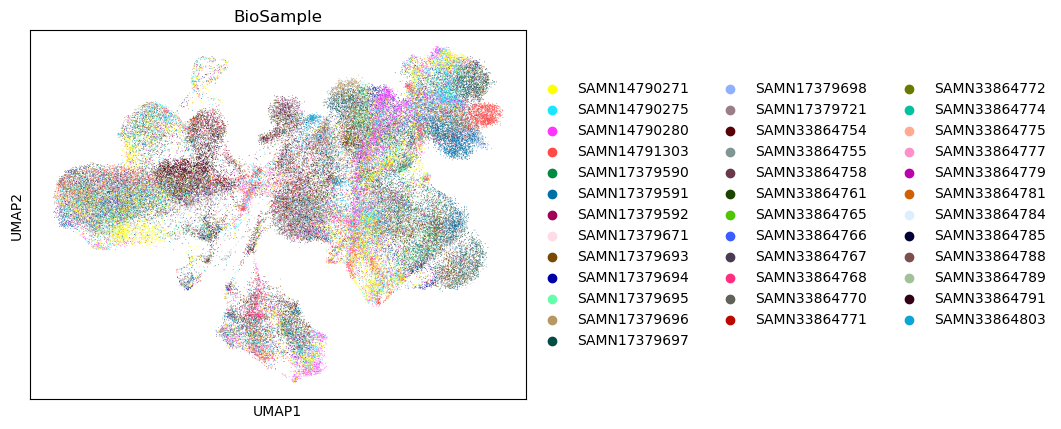

In [8]:
sc.tl.umap(healthy)
sc.pl.umap(healthy, color = "BioSample")

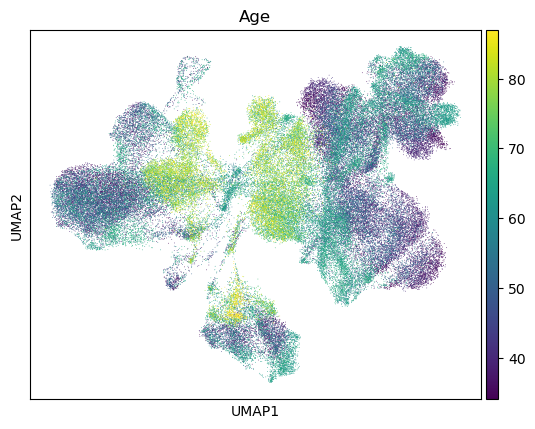

In [9]:
sc.pl.umap(healthy, color = "Age")

C:\ProgramData\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


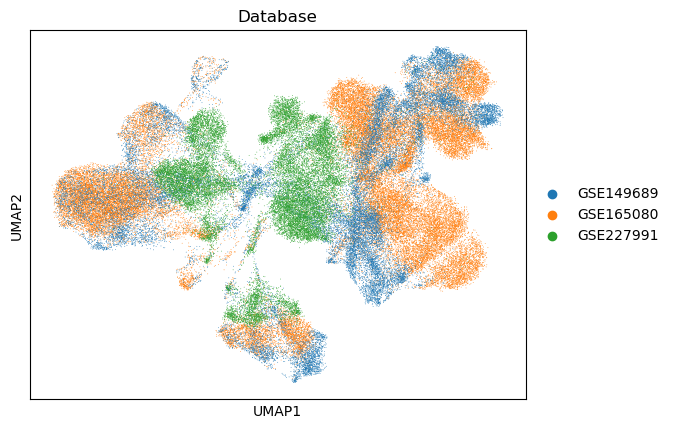

In [10]:
sc.pl.umap(healthy, color = "Database")

In [11]:
healthy.obs

,Age,Gender,BioSample,n_genes,cell_type_l1,cell_type_l2,cell_type_l3,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,Database
AAACCTGAGAGTTGGC-1,34,female,SAMN17379694,3734,Mono,CD14 Mono,CD14 Mono,3516,11692.0,529.0,4.524461,0,GSE165080
AAACCTGAGGGCTTGA-1,34,female,SAMN17379694,2001,other T,gdT,gdT_1,1894,4628.0,338.0,7.303370,28,GSE165080
AAACCTGCAAGCTGTT-1,34,female,SAMN17379694,2471,CD8 T,CD8 Naive,CD8 Naive,2312,7806.0,384.0,4.919293,12,GSE165080
AAACCTGCAATAAGCA-1,34,female,SAMN17379694,1487,NK,NK,NK_1,1412,2778.0,371.0,13.354932,5,GSE165080
AAACCTGCAATGTAAG-1,34,female,SAMN17379694,2423,CD8 T,CD8 TCM,CD8 TCM_1,2298,6596.0,550.0,8.338387,12,GSE165080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGGTGCACA-1-1,66,male,SAMN33864803,293,Mono,CD14 Mono,CD14 Mono,293,1149.0,0.0,0.000000,7,GSE227991
TTTGGTTAGGTTACCT-1,66,male,SAMN33864803,304,NK,NK,NK_4,304,898.0,2.0,0.222717,11,GSE227991
TTTGGTTCAGCATACT-1,66,male,SAMN33864803,263,NK,NK,NK_1,263,856.0,1.0,0.116822,10,GSE227991
TTTGTCAAGGAGCGAG-1,66,male,SAMN33864803,228,NK,NK,NK_1,228,644.0,0.0,0.000000,10,GSE227991


In [12]:
import anndata

In [13]:
# 只有 healthy 的部分
healthy.write_h5ad("GSE165080_GSE149689_GSE227991_bbknn_database.h5ad")

sc.pl.umap(healthy_pre, color = "cell_type_l1")

In [ ]:
healthy_pre = healthy_pre[healthy_pre.obs["cell_type_l1"] != "other", :]
healthy_pre

In [ ]:
healthy_test = healthy[healthy.obs.cell_type_1 == ""]

In [ ]:
# 先將annotation過後的檔案存檔，之後再從新讀檔比較省空間
import os 

os.getcwd()
os.chdir("Data/Test/")
os.getcwd()

# 只有 healthy 的部分
healthy_pre.write_h5ad("GSE165080_healthy.h5ad")

In [ ]:
# 把total的healthy donor分別做一個標記

# 這些5 13 14 19是GSE149689中表示healthy donor
# $是結尾
# 如果符合這些條件就取為...............若不符合則補other
donor_map = {'5': 'donor 1', '13': 'donor 2', '14': 'donor 3', '19': 'donor 4'}
healthy.obs['donor'] = healthy.obs.index.to_series().str.extract(r'-(5|13|14|19)$', expand=False).map(donor_map).fillna('other')
healthy.obs

In [ ]:
healthy.obs["cell_type_l1"] = healthy_cell.obs["predicted.celltype.l1"]
healthy.obs["cell_type_l2"] = healthy_cell.obs["predicted.celltype.l2"]
healthy.obs["cell_type_l3"] = healthy_cell.obs["predicted.celltype.l3"]

In [ ]:
healthy

In [ ]:
healthy.obs

In [ ]:
sc.pl.umap(healthy, color = "donor")

# 將每個Healthy Donor獨立拉出來看

In [ ]:
healthy.obs

In [ ]:
# 這些5 13 14 19是GSE149689中表示healthy donor
# $是結尾
pattern_5 = r"-5$"
pattern_13 = r"-13$"
pattern_14 = r"-14$"
pattern_19 = r"-19$"

# 每個healthy donor的結果
healthy_5 = healthy[healthy.obs_names.str.contains(pattern_5)]
healthy_13 = healthy[healthy.obs_names.str.contains(pattern_13)]
healthy_14 = healthy[healthy.obs_names.str.contains(pattern_14)]
healthy_19 = healthy[healthy.obs_names.str.contains(pattern_19)]

In [ ]:
# 移除 other
healthy_5 = healthy_5[healthy_5.obs["cell_type_l1"] != "other", :]
healthy_13 = healthy_13[healthy_13.obs["cell_type_l1"] != "other", :]
healthy_14 = healthy_14[healthy_14.obs["cell_type_l1"] != "other", :]
healthy_19 = healthy_19[healthy_19.obs["cell_type_l1"] != "other", :]

In [ ]:
healthy_19.obs_names

In [ ]:
sc.pl.umap(healthy_5, color = "cell_type_l1")
sc.pl.umap(healthy_13, color = "cell_type_l1")
sc.pl.umap(healthy_14, color = "cell_type_l1")
sc.pl.umap(healthy_19, color = "cell_type_l1")

In [ ]:
# All healthy donors
sc.pl.umap(healthy, color = "cell_type_l1")

# Cause have other gene, so filter other gene first
healthy = healthy[healthy.obs["cell_type_l1"] != "other", :]

# All healthy donors without other
sc.pl.umap(healthy, color = "cell_type_l1")

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18,10))
sc.pl.umap(healthy_5, color = "cell_type_l1",ax=axs[0, 0], show=False)
sc.pl.umap(healthy_13, color = "cell_type_l1",ax=axs[0, 1], show=False)
sc.pl.umap(healthy_14, color = "cell_type_l1",ax=axs[1, 0], show=False)
sc.pl.umap(healthy_19, color = "cell_type_l1",ax=axs[1, 1], show=False)

plt.show()